In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression, make_swiss_roll
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

MACHINE LEARNING

I - SUPERVISED LEARNING

In [2]:
# Import the data
# file_path = Path("/content/Copy_of_myopia.csv")
url = 'https://raw.githubusercontent.com/mward95/project_4/main/data/Copy_of_myopia.csv'
df = pd.read_csv(url)
df.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [3]:
import seaborn as sns

In [4]:
corr_data=df.corr()
corr_data

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
ID,1.000000,-0.058385,0.012242,0.030029,-0.009072,0.050831,-0.080880,-0.018525,0.055831,-0.089469,0.054532,0.051438,0.045723,0.045283,-0.007511,0.063068,0.099317,-0.014204
STUDYYEAR,-0.058385,1.000000,0.016331,-0.439659,0.049524,0.082645,-0.138326,-0.087708,0.108677,-0.136459,-0.262745,-0.154631,-0.045047,-0.282425,-0.186834,-0.289733,0.032799,0.038017
MYOPIC,0.012242,0.016331,1.000000,0.018526,0.061557,-0.373639,0.037752,0.107953,-0.045704,0.011855,-0.098282,0.072749,0.025874,-0.031859,-0.004032,0.036984,0.134033,0.149896
AGE,0.030029,-0.439659,0.018526,1.000000,-0.088176,-0.118255,0.220784,0.191849,-0.185531,0.202472,0.057538,0.130194,0.056929,0.399324,0.069395,0.286820,-0.039515,-0.055427
GENDER,-0.009072,0.049524,0.061557,-0.088176,1.000000,0.032448,-0.338276,-0.253011,0.074874,-0.276262,-0.103200,0.086133,-0.255194,0.024752,-0.028529,-0.047767,-0.025605,-0.009785
SPHEQ,0.050831,0.082645,-0.373639,-0.118255,0.032448,1.000000,-0.305512,-0.238784,0.072699,-0.247130,-0.022468,-0.099501,-0.031088,-0.054873,-0.080934,-0.120611,-0.131860,-0.140113
AL,-0.080880,-0.138326,0.037752,0.220784,-0.338276,-0.305512,1.000000,0.456296,-0.328939,0.941916,0.112004,0.017944,0.086328,0.098326,0.077170,0.111527,0.046948,-0.010278
ACD,-0.018525,-0.087708,0.107953,0.191849,-0.253011,-0.238784,0.456296,1.000000,-0.339291,0.199447,0.075161,0.011481,0.071666,0.051826,-0.042761,0.040157,0.115974,0.053746
LT,0.055831,0.108677,-0.045704,-0.185531,0.074874,0.072699,-0.328939,-0.339291,1.000000,-0.451594,-0.032745,0.018481,-0.025344,-0.037580,0.049095,0.002875,-0.011127,-0.015586
VCD,-0.089469,-0.136459,0.011855,0.202472,-0.276262,-0.247130,0.941916,0.199447,-0.451594,1.000000,0.096235,0.010120,0.069369,0.091759,0.082579,0.099774,0.009987,-0.025398


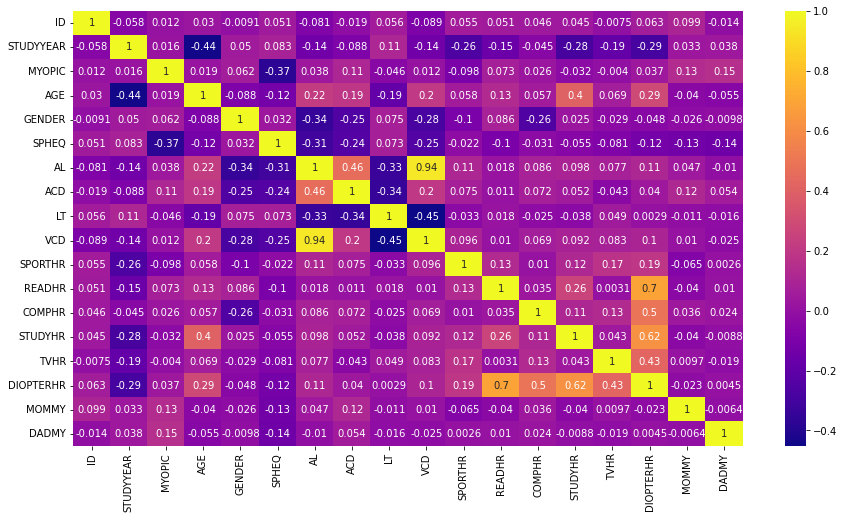

In [5]:
sns.heatmap(corr_data, annot=True,cmap="plasma")
plt.gcf().set_size_inches(15, 8)
# plt.savefig("Asset/Images/heatmap.png")
plt.show()

In [6]:
#Split data into X and y
X = df.drop(columns=["MYOPIC", "DIOPTERHR","STUDYYEAR" ])
y = df["MYOPIC"]

In [7]:
X.head()

,ID,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,MOMMY,DADMY
0,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,1,1
1,2,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,1,1
2,3,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,0,0
3,4,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,0,1
4,5,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,1,0


In [8]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: MYOPIC, dtype: int64

Split the Data

In [9]:
# Split the data into X_train, X_test, y_train, y_test
# X, y = make_classification(random_state=1)
# X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

BUILDING MODELS

1- RANDOM FOREST

In [10]:
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9112903225806451


2 - LOGISTIC REGRESSION

In [11]:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f'Testing Score: {classifier.score(X_test_scaled, y_test)}')

Training Data Score: 0.8906882591093117
Testing Score: 0.9274193548387096


In [12]:
from sklearn.metrics import confusion_matrix
y_true = y_test
# y_pred = classifier.predict(X_test)
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)
# confusion_matrix(y, classifier.predict(X))

array([[110,   2],
       [  7,   5]], dtype=int64)

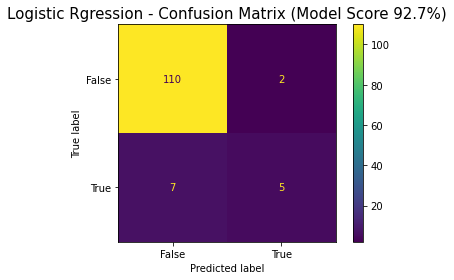

In [13]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
actual = y_test
predicted = classifier.predict(X_test_scaled)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title(label = 'Logistic Rgression - Confusion Matrix (Model Score 92.7%)', 
         fontsize = 15, 
         fontweight = 20)
plt.show()


In [14]:
# from sklearn.metrics import balanced_accuracy_score
# from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced

In [15]:
# balanced_accuracy_score(y_test, y_pred)

In [16]:
# print(classification_report_imbalanced(y_test, y_pred))

In [17]:
# importances = brf.feature_importances_
# cols = X.columns

# # Store in a DataFrame
# feature_importances_df = pd.DataFrame({'feature':cols, 'importance': importances})

# #sort dataframe
# feature_importances_df.sort_values('importance', ascending=False)